In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

data= pd.read_csv('data_nivea.csv')

In [ ]:
data[['Dia','Mes','Ano']] = data.DATA_TRM.str.split("/",expand=True,)
data.head()

,Nome,ID,HIV_TEST,SEXO,IDADE,CIDADE,DATA_TRM,MTB,RFP,DATA_CULTURA,RESULTADO,TSA,INH,RFP.1,BEM,SM,Dia,Mes,Ano
0,GENILSON PAULO DOS SANTOS,2.0,NaN,M,28.0,CABEDELO,5/8/2015,DETECTADO,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8,2015
1,MARIA VITORIA BANDEIRA DA SILVA,9.0,NaN,F,38.0,JOÃO PESSOA,5/11/2015,DETECTADO,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,11,2015
2,CASSIANO JOSE DA COSTA JUNIO,10.0,NaN,M,21.0,SANTA RITA,5/12/2015,DETECTADO,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,12,2015
3,DANIEL CARLOS SILVA DE SOUZA,21.0,SIM,M,26.0,JOÃO PESSOA,5/14/2015,DETECTADO,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,14,2015
4,SEVERINO HELENO DA SILVA,28.0,NaN,M,48.0,RIO TINTO,5/19/2015,DETECTADO,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,19,2015


In [ ]:
clean_1 = {
                "HIV_TEST":{"SIM":1},
                "MTB": {"DETECTADO":1},
                "Ano":{"15":"2015"}
                }
data.replace(clean_1, inplace=True)

In [ ]:
data = data.fillna("0")

In [ ]:
data = data.rename(columns={"SEXO":"Sexo"})
data.head()

,Nome,ID,HIV_TEST,Sexo,IDADE,CIDADE,DATA_TRM,MTB,RFP,DATA_CULTURA,RESULTADO,TSA,INH,RFP.1,BEM,SM,Dia,Mes,Ano
0,GENILSON PAULO DOS SANTOS,2,0,M,28,CABEDELO,5/8/2015,1,NÃO,0,0,0,0,0,0,0,5,8,2015
1,MARIA VITORIA BANDEIRA DA SILVA,9,0,F,38,JOÃO PESSOA,5/11/2015,1,NÃO,0,0,0,0,0,0,0,5,11,2015
2,CASSIANO JOSE DA COSTA JUNIO,10,0,M,21,SANTA RITA,5/12/2015,1,NÃO,0,0,0,0,0,0,0,5,12,2015
3,DANIEL CARLOS SILVA DE SOUZA,21,1,M,26,JOÃO PESSOA,5/14/2015,1,NÃO,0,0,0,0,0,0,0,5,14,2015
4,SEVERINO HELENO DA SILVA,28,0,M,48,RIO TINTO,5/19/2015,1,NÃO,0,0,0,0,0,0,0,5,19,2015


In [ ]:
clean_2 = {
          "CIDADE":{"JOAO PESSOA": "JOÃO PESSOA"},
          "RESULTADO":{"P+++": "P +++"},
          "RFP.1":{"s": "S"},
          "TSA":{"SIm": "SIM","Sim": "SIM"},
          "INH":{"s": "S"},
          "BEM":{"s": "S"},
          "SM":{"s": "S"},
          "RFP":{"NÃO ":"NÃO"},
          "TSA":{"0":"Negativo", "SIM": "Positivo", "Sim":"Positivo", "SIm":"Positivo"}
                }
data.replace(clean_2, inplace=True)

In [ ]:
data['HIV_TEST']=data['HIV_TEST'].astype(int)
data['IDADE']=data['IDADE'].astype(int)
data['Ano']=data['Ano'].astype(int)

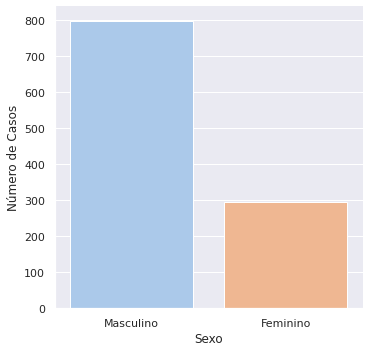

In [ ]:
g =sns.catplot(x="Sexo", kind="count",  data=data, palette="pastel", estimator=lambda x:  len(data))
g.set_xticklabels(['Posito', 'Negativo'])
g.set_axis_labels('Sexo', 'Número de Casos')
g.set_xticklabels(['Masculino', 'Feminino'])

In [ ]:
data.Sexo.value_counts(normalize=True) * 100

M    72.968037
F    27.031963
Name: Sexo, dtype: float64

In [ ]:
data_new = {"Ano":[2015, 2016, 2017, 2018, 2019], "Sensibilidade":[169, 193, 215,357,197],"Resistência":[7,7,23,14,11]}
df4 = pd.DataFrame.from_dict(data_new)
df4.plot(x="Ano", y=["Sensibilidade", "Resistência"], kind="bar", colormap='Set3')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

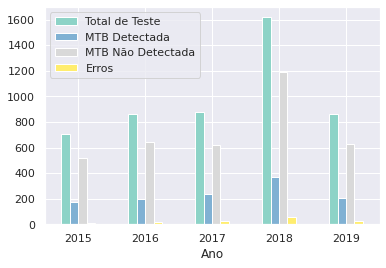

In [ ]:
data_new1 = {"Ano":[2015, 2016, 2017, 2018, 2019], "Total de Teste":[707,860,879,1618,862],"MTB Detectada":[176,200,238,371,208],
             "MTB Não Detectada":[518, 642, 619, 1188,629], "Erros":[13,18,22,59,29]}
df5 = pd.DataFrame.from_dict(data_new1)

df5.plot(x="Ano", y=["Total de Teste","MTB Detectada","MTB Não Detectada","Erros"], kind="bar", colormap='Set3')
plt.xticks(rotation=0)


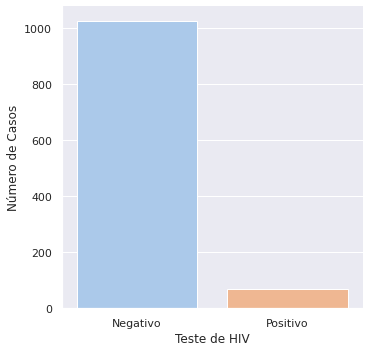

In [ ]:
h =sns.catplot(x="HIV_TEST", kind="count",  data=data, palette="pastel", estimator=lambda x:  len(data))
h.set_xticklabels(['Negativo', 'Positivo'])
h.set_axis_labels('Teste de HIV', 'Número de Casos')

In [ ]:
data.HIV_TEST.value_counts(normalize=True) * 100

0    93.607306
1     6.392694
Name: HIV_TEST, dtype: float64

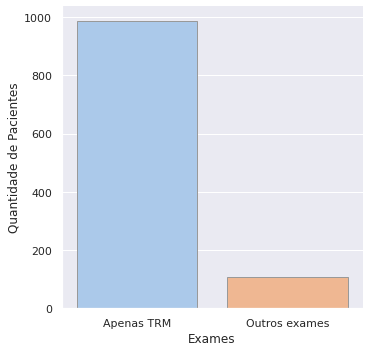

In [ ]:
t = sns.catplot(x="TSA", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);
t.set_xticklabels(['Apenas TRM', 'Outros exames'])
t.set_axis_labels('Exames', 'Quantidade de Pacientes')

In [ ]:
data.TSA.value_counts(normalize=True) * 100

Negativo    90.136986
Positivo     9.863014
Name: TSA, dtype: float64

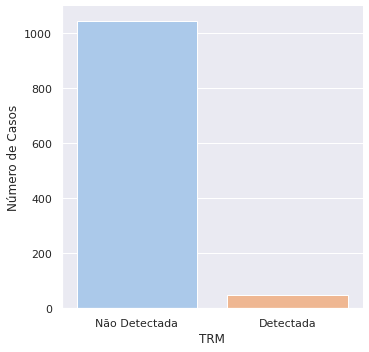

In [ ]:
g =sns.catplot(x="RFP",
            kind="count", palette="pastel", data=data)
g.set_xticklabels(['Não Detectada', 'Detectada'])
g.set_axis_labels('TRM', 'Número de Casos')

In [ ]:
data.RFP.value_counts(normalize=True) * 100

NÃO           95.525114
RESISTENTE     4.474886
Name: RFP, dtype: float64

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,90]
labels=[1,2,3,4,5,6,7,8,9]
data['IDADE'] = pd.cut(data['IDADE'], bins=bins, labels=labels, right=False)

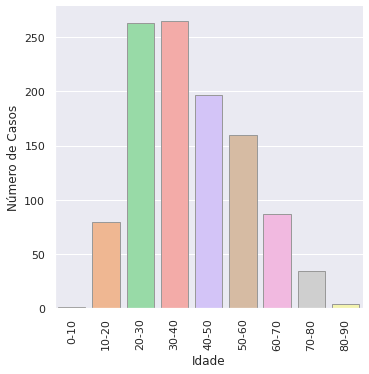

In [ ]:
s = sns.catplot(x="IDADE", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);
s.set_xticklabels(['0-10', '10-20','20-30','30-40','40-50','50-60','60-70', '70-80', '80-90'], rotation= 90)
s.set_axis_labels('Idade', 'Número de Casos')

In [ ]:
data.IDADE.value_counts(normalize=True) * 100

4    24.289643
3    24.106324
5    18.056829
6    14.665445
7     7.974335
2     7.332722
8     3.116407
9     0.366636
1     0.091659
Name: IDADE, dtype: float64

In [ ]:
df = data[['INH','RFP.1','BEM','SM']]

In [ ]:
df = df.rename(columns={"RFP.1":"RMP","BEM":"EMB"})

clean_4 = {
                "INH":{"0":"Negativo", "S": "Sensível", "R":"Resistente"},
                "RMP":{"0":"Negativo", "S": "Sensível", "R":"Resistente"},
                "EMB":{"0":"Negativo", "S": "Sensível", "R":"Resistente"},
                "SM":{"0":"Negativo", "S": "Sensível", "R":"Resistente"},
                }

df.replace(clean_4, inplace=True)


In [ ]:
pieces = []
for col in df.columns:
    tmp_series = df[col].value_counts()
    tmp_series.name = col
    pieces.append(tmp_series)
    
df_value_counts = pd.concat(pieces, axis=1)

In [ ]:
df_value_counts =  df_value_counts[1:]

Text(0, 0.5, 'Número de Testes')

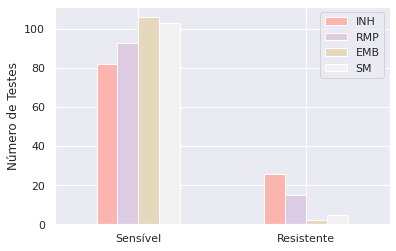

In [ ]:
df_value_counts.plot(kind='bar', colormap= 'Pastel1', rot= 0)
plt.ylabel('Número de Testes')

In [ ]:
data.head()

,Nome,ID,HIV_TEST,Sexo,IDADE,CIDADE,DATA_TRM,MTB,RFP,DATA_CULTURA,RESULTADO,TSA,INH,RFP.1,BEM,SM,Dia,Mes,Ano
0,GENILSON PAULO DOS SANTOS,2,0,M,3,CABEDELO,5/8/2015,1,NÃO,0,0,Negativo,0,0,0,0,5,8,2015
1,MARIA VITORIA BANDEIRA DA SILVA,9,0,F,4,JOÃO PESSOA,5/11/2015,1,NÃO,0,0,Negativo,0,0,0,0,5,11,2015
2,CASSIANO JOSE DA COSTA JUNIO,10,0,M,3,SANTA RITA,5/12/2015,1,NÃO,0,0,Negativo,0,0,0,0,5,12,2015
3,DANIEL CARLOS SILVA DE SOUZA,21,1,M,3,JOÃO PESSOA,5/14/2015,1,NÃO,0,0,Negativo,0,0,0,0,5,14,2015
4,SEVERINO HELENO DA SILVA,28,0,M,5,RIO TINTO,5/19/2015,1,NÃO,0,0,Negativo,0,0,0,0,5,19,2015


In [ ]:
data_time= data[['DATA_TRM', 'DATA_CULTURA']]
data_time.head()

,DATA_TRM,DATA_CULTURA
0,5/8/2015,0
1,5/11/2015,0
2,5/12/2015,0
3,5/14/2015,0
4,5/19/2015,0


In [ ]:
mask = data_time['DATA_CULTURA'] != '0'
data_timing = data_time[mask]

In [ ]:
data_timing = data_timing.apply(pd.to_datetime)

In [ ]:
data_timing

,DATA_TRM,DATA_CULTURA
61,2015-07-31,2016-03-11
63,2015-08-19,2015-11-20
64,2015-08-21,2015-10-14
76,2015-08-03,2015-08-24
81,2015-08-17,2015-08-20
...,...,...
1008,2019-03-11,2019-06-05
1018,2019-04-04,2019-06-05
1020,2019-04-10,2019-06-05
1035,2019-04-05,2019-05-31


In [ ]:
data_timing['Difference'] = data_timing['DATA_CULTURA'].sub(data_timing['DATA_TRM'], axis=0)  
data_timing['Difference']= data_timing['Difference'].astype(str)
data_timing.head()

,DATA_TRM,DATA_CULTURA,Difference,Time
61,2015-07-31,2016-03-11,224 days 00:00:00.000000000,NaN
63,2015-08-19,2015-11-20,93 days 00:00:00.000000000,5
64,2015-08-21,2015-10-14,54 days 00:00:00.000000000,3
76,2015-08-03,2015-08-24,21 days 00:00:00.000000000,2
81,2015-08-17,2015-08-20,3 days 00:00:00.000000000,1


In [ ]:
data_timing['Time'] = data_timing.Difference.apply(lambda x: x.split(' ')[0])
data_timing['Time'] = data_timing['Time'].astype(int)
data_timing['Time'] = data_timing['Time'].abs()

In [ ]:
bins = [0,10,30,60,90,120,150,180,210]
labels=[1,2,3,4,5,6,7,8]
data_timing['Time'] = pd.cut(data_timing['Time'], bins=bins, labels=labels, right=False)

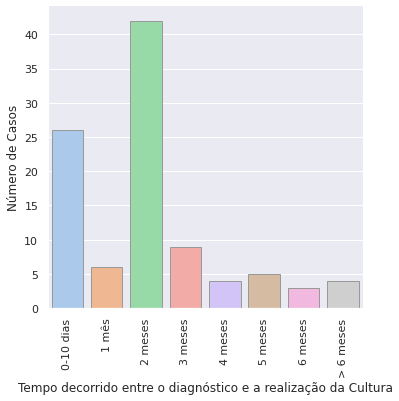

In [ ]:
h = sns.catplot(x="Time", kind="count",
            palette="pastel", edgecolor=".6",
            data=data_timing);
h.set_xticklabels(['0-10 dias', '1 mês','2 meses','3 meses','4 meses','5 meses','6 meses', '> 6 meses'], rotation=90)
h.set_axis_labels('Tempo decorrido entre o diagnóstico e a realização da Cultura', 'Número de Casos')

In [ ]:
data_timing.Time.value_counts(normalize= True) * 100

3    42.424242
1    26.262626
4     9.090909
2     6.060606
6     5.050505
8     4.040404
5     4.040404
7     3.030303
Name: Time, dtype: float64

In [ ]:
mask= data['TSA'] != 'Negativo'
data2 = data[mask]
data2.head()

,Nome,ID,HIV_TEST,Sexo,IDADE,CIDADE,DATA_TRM,MTB,RFP,DATA_CULTURA,RESULTADO,TSA,INH,RFP.1,BEM,SM,Dia,Mes,Ano
61,JOAO EVANGELISTA FELIPE,269,0,M,5,CAMPO DE SANTANA,31/07/15,1,RESISTENTE,3/11/2016,P +++,Positivo,R,R,S,S,31,07,2015
63,ALBERTINA GUILHERME DA SILVA,347,0,F,8,SANTA RITA,8/19/2015,1,NÃO,11/20/2015,P +++,Positivo,R,S,S,S,8,19,2015
64,ALEXANDRA LOPES DE OLIVEIRA,372,0,F,2,JOÃO PESSOA,8/21/2015,1,NÃO,10/14/2015,P +++,Positivo,S,S,S,S,8,21,2015
76,LAIZA DE OLIVEIRA SILVA,277,0,F,3,JOÃO PESSOA,8/3/2015,1,NÃO,8/24/2015,P++,Positivo,S,S,S,S,8,3,2015
81,RAFAEL PEREIRA DOS SANTOS,338,0,M,4,JOÃO PESSOA,8/17/2015,1,RESISTENTE,8/20/2015,P +++,Positivo,R,R,S,R,8,17,2015


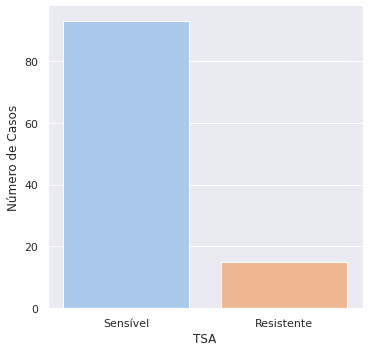

In [ ]:
g =sns.catplot(x="RFP.1", order=["S", "R"],
            kind="count", palette="pastel", data=data2)
g.set_xticklabels(['Sensível', 'Resistente'])
g.set_axis_labels('TSA','Número de Casos')

In [ ]:
data2['RFP.1'].value_counts(normalize=True) * 100

S    86.111111
R    13.888889
Name: RFP.1, dtype: float64

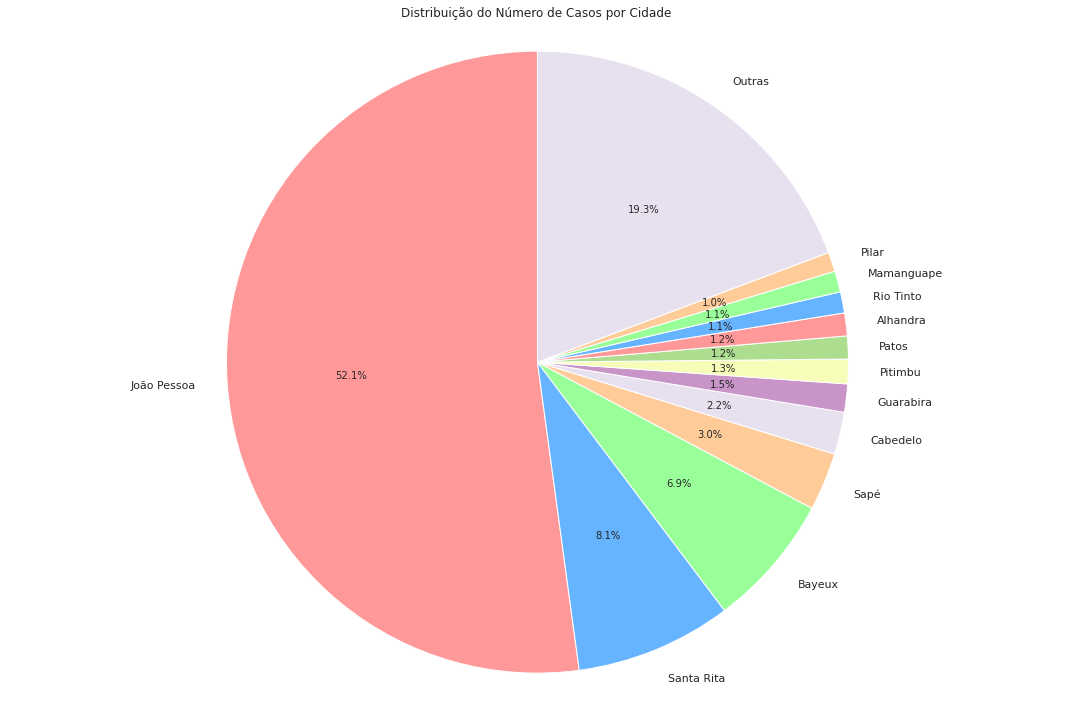

In [ ]:
# Pie chart
labels =  ['João Pessoa','Santa Rita','Bayeux','Sapé',
'Cabedelo','Guarabira','Pitimbu','Patos','Alhandra',
'Rio Tinto','Mamanguape','Pilar','Outras']
sizes = [571,89,76,33,24,16,14,13,13,12,12,11,211]
# only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#e7e1ef', '#c994c7', '#f7fcb9','#addd8e'] 
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribuição do Número de Casos por Cidade')
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('cidade.png')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


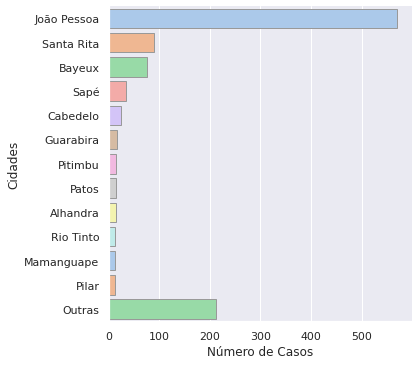

In [ ]:
p = sns.catplot(y=labels, x=sizes, kind="bar",
            palette="pastel", edgecolor=".6",
            data=data);
p.set_axis_labels('Número de Casos', 'Cidades')